<a href="https://colab.research.google.com/github/Gowtham-123-AI071/1BM23AI071_DAV_LAB/blob/main/DAV_LAB_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px

In [2]:
df=pd.read_csv('/content/uber-raw-data-aug14.csv')
display(df)

,Date/Time,Lat,Lon,Base
0,8/1/2014 0:03:00,40.7366,-73.9906,B02512
1,8/1/2014 0:09:00,40.7260,-73.9918,B02512
2,8/1/2014 0:12:00,40.7209,-74.0507,B02512
3,8/1/2014 0:12:00,40.7387,-73.9856,B02512
4,8/1/2014 0:12:00,40.7323,-74.0077,B02512
...,...,...,...,...
829270,8/31/2014 23:55:00,40.7552,-73.9753,B02764
829271,8/31/2014 23:55:00,40.7552,-73.9753,B02764
829272,8/31/2014 23:55:00,40.7617,-73.9788,B02764
829273,8/31/2014 23:59:00,40.7395,-73.9889,B02764


Text(0.5, 1.0, 'Uber Pickups by Day of Week and Hour of Day')

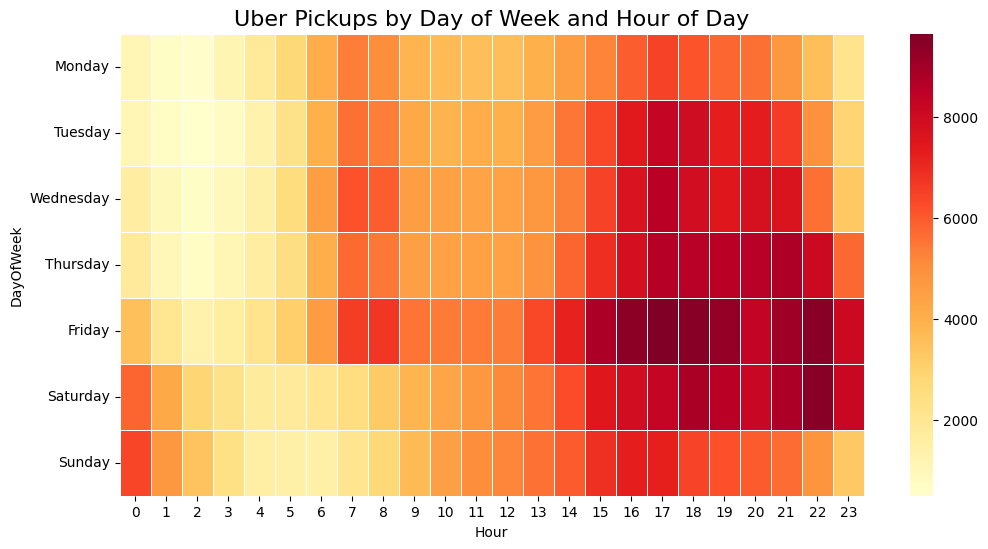

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('/content/uber-raw-data-aug14.csv')
df['Date/Time'] = pd.to_datetime(df['Date/Time'])
df['DayOfWeek'] = df['Date/Time'].dt.day_name()
df['Hour'] = df['Date/Time'].dt.hour
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
heatmap_data = df.pivot_table(index='DayOfWeek', columns='Hour', values='Date/Time', aggfunc='count')
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
heatmap_data = df.pivot_table(index='DayOfWeek', columns='Hour', values='Date/Time', aggfunc='count')
heatmap_data = heatmap_data.reindex(days_order)
plt.figure(figsize=(12,6))
sns.heatmap(heatmap_data, cmap='YlOrRd', linewidths=0.5)

plt.title('Uber Pickups by Day of Week and Hour of Day', fontsize=16)


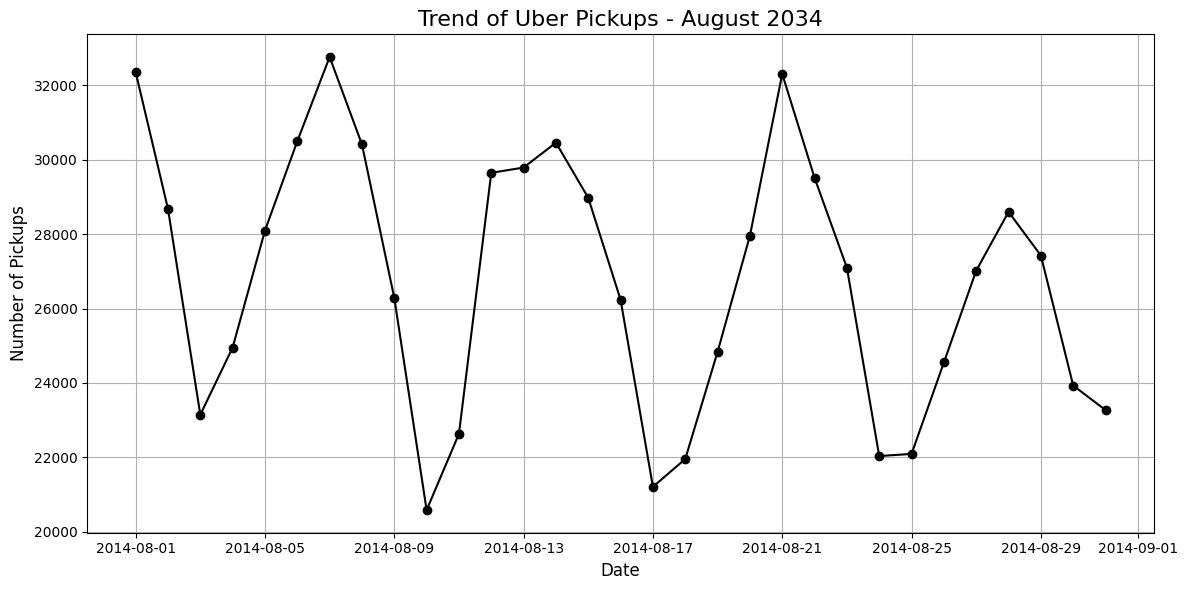

In [7]:
df['Date/Time'] = pd.to_datetime(df['Date/Time'])
df['Date'] = df['Date/Time'].dt.date
daily_pickups = df.groupby('Date').size()

plt.figure(figsize=(12,6))
plt.plot(daily_pickups.index, daily_pickups.values, marker='o', color='black')
plt.title('Trend of Uber Pickups - August 2034', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Pickups', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


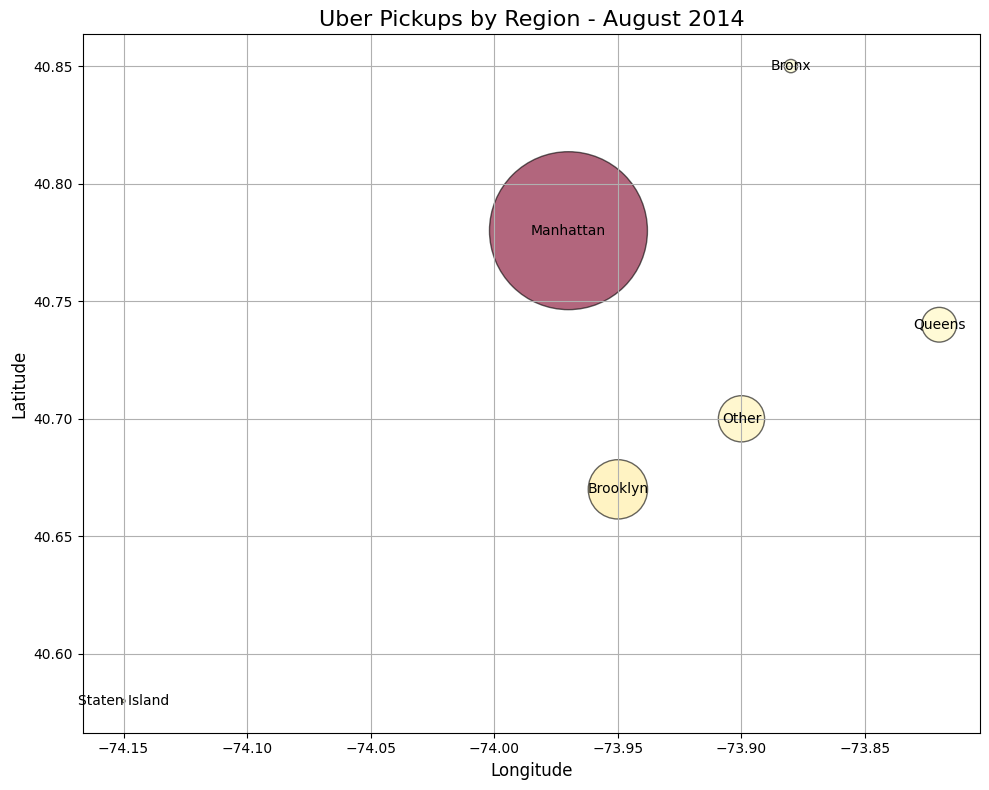

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv('/content/uber-raw-data-aug14.csv')
df['Date/Time'] = pd.to_datetime(df['Date/Time'])

def classify_region(lat, lon):
    if 40.70 <= lat <= 40.85 and -74.02 <= lon <= -73.93:
        return 'Manhattan'
    elif 40.57 <= lat <= 40.74 and -74.05 <= lon <= -73.85:
        return 'Brooklyn'
    elif 40.84 <= lat < 40.91 and -73.92 <= lon <= -73.77:
        return 'Bronx'
    elif 40.65 <= lat <= 40.80 and -73.90 <= lon <= -73.70:
        return 'Queens'
    elif 40.48 <= lat <= 40.65 and -74.25 <= lon <= -74.05:
        return 'Staten Island'
    else:
        return 'Other'

df['Region'] = df.apply(lambda x: classify_region(x['Lat'], x['Lon']), axis=1)
region_pickups = df.groupby('Region').size().reset_index(name='Pickups')

region_centers = {
    'Manhattan': (-73.97, 40.78),
    'Brooklyn': (-73.95, 40.67),
    'Bronx': (-73.88, 40.85),
    'Queens': (-73.82, 40.74),
    'Staten Island': (-74.15, 40.58),
    'Other': (-73.9, 40.7)
}

region_pickups['Lon'] = region_pickups['Region'].map(lambda x: region_centers[x][0])
region_pickups['Lat'] = region_pickups['Region'].map(lambda x: region_centers[x][1])

plt.figure(figsize=(10,8))
plt.scatter(region_pickups['Lon'], region_pickups['Lat'],
            s=region_pickups['Pickups'] / 50, c=region_pickups['Pickups'],
            cmap='YlOrRd', alpha=0.6, edgecolors='k')

for i, row in region_pickups.iterrows():
    plt.text(row['Lon'], row['Lat'], row['Region'], fontsize=10, ha='center', va='center')

plt.title('Uber Pickups by Region - August 2014', fontsize=16)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()
